## **DATA SCIENCIE CODERHOUSE: COMISIÓN 61750**

## Alumno: Moragues Oriana

### Introducción


El análisis del conjunto de datos de supermercados, compuesto por 39 columnas, nos permite explorar diversas hipótesis relacionadas con el comportamiento de los clientes, las ventas y los costos operativos. Este proyecto tiene como objetivo proporcionar una comprensión profunda de los factores que influyen en las ventas unitarias y los costos asociados en diferentes mercados, ayudando a las tiendas a optimizar sus estrategias de promoción y segmentación de clientes.

### Descripción del problema

Los supermercados enfrentan el desafío de maximizar sus ventas mientras controlan los costos operativos. Además, necesitan comprender las diferencias en el comportamiento de los clientes según diversas características demográficas y geográficas. Este análisis busca identificar patrones y tendencias que puedan ser utilizados para diseñar estrategias de marketing y promociones efectivas, adaptadas a los comportamientos específicos de los clientes.




### Objetivo

El objetivo principal del análisis de este conjunto de datos de supermercados es identificar patrones y tendencias que permitan a las tiendas optimizar sus estrategias de promoción, ventas y segmentación de clientes. Este proyecto busca proporcionar insights profundos que nos permitan predecir el incremento en las ventas unitarias debido a promociones específicas; diferencias en ventas y costos operativos entre distintas regiones geográficas; preferencias de compra de los clientes con diferentes perfiles educativos y demográficos; influencia de las características físicas de los supermercados en las ventas; y tendencias de crecimiento de ventas de marcas específicas a lo largo del tiempo. Estas predicciones permitirán obtener insights valiosos para optimizar estrategias de marketing, mejorar la eficiencia operativa y personalizar las ofertas para diferentes segmentos de clientes.

### Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace:
https://www.kaggle.com/code/mayurspawar/customer-acquisition-prediction/data

Este conjunto de datos proporciona información detallada sobre ventas en supermercados, incluidos atributos como categoría de comida, departamento de alimentos, familia de comida, ventas y costos de tienda, promociones, características demográficas de los clientes, y especificaciones de los productos y tiendas. El uso de estos datos permitirá realizar un análisis exhaustivo y construir modelos predictivos robustos para optimizar las estrategias de promoción, segmentación de clientes y gestión de costos, mejorando así la eficiencia operativa y la satisfacción del cliente en el sector minorista.

### Importación de Librerías y Carga de Datos

In [4]:
#Importe librerias con la que quiero trabajar.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
#Se importa un dataset cargado previamente en GitHub.
url='https://raw.githubusercontent.com/Lic-Moragues/DS1/refs/heads/main/media%20prediction%20and%20its%20cost.csv'
df_archivo= pd.read_csv(url, sep=',', header= None)


<ipython-input-5-bacc7191d10d>:3: DtypeWarning: Columns (3,4,5,10,15,17,18,20,21,22,23,24,25,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_archivo= pd.read_csv(url, sep=',', header= None)


### Exploración de datos


In [6]:
df_archivo.head()

0                1            2                         3   \
0    food_category  food_department  food_family  store_sales(in millions)   
1  Breakfast Foods     Frozen Foods         Food                      7.36   
2  Breakfast Foods     Frozen Foods         Food                      5.52   
3  Breakfast Foods     Frozen Foods         Food                      3.68   
4  Breakfast Foods     Frozen Foods         Food                      3.68   

                        4                        5                      6   \
0  store_cost(in millions)  unit_sales(in millions)         promotion_name   
1                   2.7232                      4.0           Bag Stuffers   
2                   2.5944                      3.0  Cash Register Lottery   
3                   1.3616                      2.0    High Roller Savings   
4                   1.1776                      2.0  Cash Register Lottery   

              7               8       9   ...            30           31  \
0  sales_country  marital_status  gender  ...  grocery_sqft  frozen_sqft   
1            USA               M       F  ...       18670.0       5415.0   
2            USA               M       M  ...       18670.0       5415.0   
3            USA               S       F  ...       18670.0       5415.0   
4            USA               M       F  ...       18670.0       5415.0   

          32          33           34         35             36       37  \
0  meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist   
1     3610.0         1.0          1.0        1.0            1.0      1.0   
2     3610.0         1.0          1.0        1.0            1.0      1.0   
3     3610.0         1.0          1.0        1.0            1.0      1.0   
4     3610.0         1.0          1.0        1.0            1.0      1.0   

                   38      39  
0          media_type    cost  
1  Daily Paper, Radio  126.62  
2  Daily Paper, Radio   59.86  
3  Daily Paper, Radio   84.16  
4     In-Store Coupon   95.78  

[5 rows x 40 columns]

In [7]:
#Dimención inicial del dataframe
df_archivo.shape

(60429, 40)

Este conjunto de datos cuenta con 60429 registros y 40 columnas


In [8]:
#Cree un diccionario para renombrar las columnas originales con la fila 0:
df_columnas = {0:'food_category',1:'food_department',2:'food_family',3:'store_sales(in millions)',4:'store_cost(in millions)',5:'unit_sales(in millions)',6:'promotion_name',7:'sales_country',8:'marital_status',9:'gender',10:'total_children',11:'education',12:'member_card',13:'occupation',14:'houseowner',15:'avg_cars_at home(approx)',16:'avg. yearly_income',17:'num_children_at_home',18:'avg_cars_at home(approx)',19:'brand_name',20:'SRP',21:'gross_weight',22:'net_weight',23:'recyclable_package',24:'low_fat',25:'units_per_case',26:'store_type',27:'store_city',28:'store_state',29:'store_sqft',30:'grocery_sqft',31:'frozen_sqft',32:'meat_sqft',33:'coffee_bar',34:'video_store',35:'salad_bar',36:'prepared_food',37:'florist',38:'media_type',39:'cost'}
df_columnas

{0: 'food_category',
 1: 'food_department',
 2: 'food_family',
 3: 'store_sales(in millions)',
 4: 'store_cost(in millions)',
 5: 'unit_sales(in millions)',
 6: 'promotion_name',
 7: 'sales_country',
 8: 'marital_status',
 9: 'gender',
 10: 'total_children',
 11: 'education',
 12: 'member_card',
 13: 'occupation',
 14: 'houseowner',
 15: 'avg_cars_at home(approx)',
 16: 'avg. yearly_income',
 17: 'num_children_at_home',
 18: 'avg_cars_at home(approx)',
 19: 'brand_name',
 20: 'SRP',
 21: 'gross_weight',
 22: 'net_weight',
 23: 'recyclable_package',
 24: 'low_fat',
 25: 'units_per_case',
 26: 'store_type',
 27: 'store_city',
 28: 'store_state',
 29: 'store_sqft',
 30: 'grocery_sqft',
 31: 'frozen_sqft',
 32: 'meat_sqft',
 33: 'coffee_bar',
 34: 'video_store',
 35: 'salad_bar',
 36: 'prepared_food',
 37: 'florist',
 38: 'media_type',
 39: 'cost'}

Este diccionario es útil para asignar a los nombres de columnas índices númericos enteros y para renombrar las columnas del dataset para que sea más descriptivo y útil para el análisis de datos.

In [9]:
#Verifico los valores con los que deseamos trabajar en nuestro Dataset
# Omito la primera fila.
df_Valores= df_archivo.values[1:,:]
df_Valores

array([['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '126.62'],
       ['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '59.86'],
       ['Breakfast Foods', 'Frozen Foods', 'Food', ..., '1.0',
        'Daily Paper, Radio', '84.16'],
       ...,
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 0.0,
        'Sunday Paper, Radio, TV', 67.51],
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 1.0,
        'Sunday Paper', 132.88],
       ['Specialty', 'Carousel', 'Non-Consumable', ..., 1.0,
        'Daily Paper, Radio', 87.76]], dtype=object)

Este código toma los datos del DataFrame, excluye la primera fila y almacena el resto en df_Valores.

In [10]:
#Creo un nuevo dataframe
df=pd.DataFrame(df_Valores,columns=df_columnas)
df.rename(columns=df_columnas,inplace=True)
df.head()

food_category food_department food_family store_sales(in millions)  \
0  Breakfast Foods    Frozen Foods        Food                     7.36   
1  Breakfast Foods    Frozen Foods        Food                     5.52   
2  Breakfast Foods    Frozen Foods        Food                     3.68   
3  Breakfast Foods    Frozen Foods        Food                     3.68   
4  Breakfast Foods    Frozen Foods        Food                     4.08   

  store_cost(in millions) unit_sales(in millions)         promotion_name  \
0                  2.7232                     4.0           Bag Stuffers   
1                  2.5944                     3.0  Cash Register Lottery   
2                  1.3616                     2.0    High Roller Savings   
3                  1.1776                     2.0  Cash Register Lottery   
4                   1.428                     3.0       Double Down Sale   

  sales_country marital_status gender  ... grocery_sqft frozen_sqft meat_sqft  \
0           USA              M      F  ...      18670.0      5415.0    3610.0   
1           USA              M      M  ...      18670.0      5415.0    3610.0   
2           USA              S      F  ...      18670.0      5415.0    3610.0   
3           USA              M      F  ...      18670.0      5415.0    3610.0   
4           USA              M      M  ...      18670.0      5415.0    3610.0   

  coffee_bar video_store salad_bar prepared_food florist          media_type  \
0        1.0         1.0       1.0           1.0     1.0  Daily Paper, Radio   
1        1.0         1.0       1.0           1.0     1.0  Daily Paper, Radio   
2        1.0         1.0       1.0           1.0     1.0  Daily Paper, Radio   
3        1.0         1.0       1.0           1.0     1.0     In-Store Coupon   
4        1.0         1.0       1.0           1.0     1.0               Radio   

     cost  
0  126.62  
1   59.86  
2   84.16  
3   95.78  
4   50.79  

[5 rows x 40 columns]

Se crea un nuevo DataFrame llamado df usando los valores contenidos en df_Valores y las columnas de este serán nombradas según los valores del diccionario df_columnas.

In [11]:
#Verifico nueva dimensión DataFrame
df.shape

(60428, 40)

In [12]:
#Se observa el tipo de dato
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   food_category             60428 non-null  object
 1   food_department           60428 non-null  object
 2   food_family               60428 non-null  object
 3   store_sales(in millions)  60428 non-null  object
 4   store_cost(in millions)   60428 non-null  object
 5   unit_sales(in millions)   60428 non-null  object
 6   promotion_name            60428 non-null  object
 7   sales_country             60428 non-null  object
 8   marital_status            60428 non-null  object
 9   gender                    60428 non-null  object
 10  total_children            60428 non-null  object
 11  education                 60428 non-null  object
 12  member_card               60428 non-null  object
 13  occupation                60428 non-null  object
 14  houseowner            

Se observa que el tipo de datos de las variebles son de tipo object.


**VARIABLES POTENCIALMENTE RELEVANTES**

Algunas de las variables que podrìan ser relevantes para predecir las estrategias de marketing son: promotion_name, store_sales(in millions), store_cost(in millions), unit_sales(in millions), sales_country, education, store_type, marital_status, brand_name, gender.

In [13]:
#Miramos la descripción de las princiapales medidas de cada columna:
df.describe()

food_category food_department food_family  store_sales(in millions)  \
count          60428           60428       60428                   60428.0   
unique            45              22           3                    1767.0   
top       Vegetables         Produce        Food                       4.8   
freq            7440            8521       43284                     232.0   

        store_cost(in millions)  unit_sales(in millions)    promotion_name  \
count                  60428.00                  60428.0             60428   
unique                 15073.00                     12.0                49   
top                        2.16                      3.0  Weekend Markdown   
freq                      52.00                  20064.0              2330   

       sales_country marital_status gender  ...  grocery_sqft frozen_sqft  \
count          60428          60428  60428  ...       60428.0     60428.0   
unique             3              2      2  ...          40.0        40.0   
top              USA              S      F  ...       22123.0      7041.0   
freq           38892          30355  30942  ...        4134.0      4134.0   

       meat_sqft coffee_bar video_store  salad_bar prepared_food  florist  \
count    60428.0    60428.0     60428.0    60428.0       60428.0  60428.0   
unique      40.0        4.0         4.0        4.0           4.0      4.0   
top       4694.0        1.0         0.0        1.0           1.0      1.0   
freq      4134.0    26967.0     28472.0    25876.0       25876.0  24715.0   

                media_type      cost  
count                60428  60428.00  
unique                  13    656.00  
top     Daily Paper, Radio    101.84  
freq                  6820    587.00  

[4 rows x 40 columns]

Hay 60428 registros

food_category: Hay 45 categorias de comidas y en el top esta vegetales como mas elegida.

promotion_name: en el top esta Weekend Markdown.

sales_country: de los 3 países identificado en el top esta USA.


In [14]:
#Realizamos la validación de valores nulos como Booleanos
df.isnull().sum().astype(bool)

food_category               False
food_department             False
food_family                 False
store_sales(in millions)    False
store_cost(in millions)     False
unit_sales(in millions)     False
promotion_name              False
sales_country               False
marital_status              False
gender                      False
total_children              False
education                   False
member_card                 False
occupation                  False
houseowner                  False
avg_cars_at home(approx)    False
avg. yearly_income          False
num_children_at_home        False
avg_cars_at home(approx)    False
brand_name                  False
SRP                         False
gross_weight                False
net_weight                  False
recyclable_package          False
low_fat                     False
units_per_case              False
store_type                  False
store_city                  False
store_state                 False
store_sqft                  False
grocery_sqft                False
frozen_sqft                 False
meat_sqft                   False
coffee_bar                  False
video_store                 False
salad_bar                   False
prepared_food               False
florist                     False
media_type                  False
cost                        False
dtype: bool

Se confirma con este código que no existen valores nulos.

### Hipótesis planteadas:

1. Las promociones como "Weekend Markdown" incrementan significativamente las ventas unitarias.
2. Estados unidos genera más ventas pero a mayor costo que México y Canadá.
3. Los clientes que tienen nivel educativo más alto tienden a comprar productos en Supermercados de lujo o de tipo Gourmet.
4. Los clientes solteros compran más comida congeleda.
5. La mediana del costo total de ventas de los hombres es mayor al de las mujeres.
6. La mayor tendencia en ventas es la marca Carrington.

### Mejoras del dataset

Formateamos columnas a datos de tipo númericos para poder utilizarlas en futuros gráficos

Columna store_cost(in millions)

In [15]:
df['store_cost(in millions)'] = df['store_cost(in millions)'].replace({',': ''}, regex=True)

In [16]:
df['store_cost(in millions)'] = pd.to_numeric(df['store_cost(in millions)'], errors='coerce')

Columna store_sales(in millions)

In [17]:
df['store_sales(in millions)'] = df['store_sales(in millions)'].replace({',': ''}, regex=True)

In [18]:
df['store_sales(in millions)'] = pd.to_numeric(df['store_sales(in millions)'], errors='coerce')

Columna avg. yearly_income

In [19]:
df['avg. yearly_income'] = df['avg. yearly_income'].replace({',': ''}, regex=True)

In [20]:
df['avg. yearly_income'] = pd.to_numeric(df['avg. yearly_income'], errors='coerce')

Columna cost

In [21]:
df['cost'] = df['cost'].replace({',': ''}, regex=True)

In [22]:
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [23]:
#Nueva exploración con datos formateados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  object 
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   marital_status            60428 non-null  object 
 9   gender                    60428 non-null  object 
 10  total_children            60428 non-null  object 
 11  education                 60428 non-null  object 
 12  member_card               60428 non-null  object 
 13  occupation                60428 non-null  object 
 14  houseo

In [24]:
df.describe()


store_sales(in millions)  store_cost(in millions)  avg. yearly_income  \
count              60428.000000             60428.000000                 0.0   
mean                   6.541031                 2.619460                 NaN   
std                    3.463047                 1.453009                 NaN   
min                    0.510000                 0.163200                 NaN   
25%                    3.810000                 1.500000                 NaN   
50%                    5.940000                 2.385600                 NaN   
75%                    8.670000                 3.484025                 NaN   
max                   22.920000                 9.726500                 NaN   

               cost  
count  60428.000000  
mean      99.262366  
std       30.011257  
min       50.790000  
25%       69.650000  
50%       98.520000  
75%      126.620000  
max      149.750000

### Impacto de las promociones de venta

In [25]:
#Agrupamos las ventas en las tiendas por nombres de la promoción:
sales_by_promotion = df.groupby('promotion_name')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()

In [26]:
print(sales_by_promotion)

             promotion_name  store_sales(in millions)  store_cost(in millions)
0              Bag Stuffers                   6932.32                2767.7471
1              Best Savings                   5454.58                2195.0372
2                 Big Promo                   7503.66                3020.6026
3        Big Time Discounts                   9805.89                3936.3625
4          Big Time Savings                   4995.39                1994.6641
5              Bye Bye Baby                   5554.61                2234.1963
6     Cash Register Lottery                   9821.71                3955.9581
7        Coupon Spectacular                   2350.58                 936.9022
8                 Dimes Off                   7482.87                2998.4700
9            Dollar Cutters                   8478.62                3389.6142
10              Dollar Days                   3461.17                1384.7203
11         Double Down Sale                  11443.0

In [27]:
sales_by_promotion.groupby('promotion_name').describe()

store_sales(in millions)                          \
                                           count      mean std       min   
promotion_name                                                             
Bag Stuffers                                 1.0   6932.32 NaN   6932.32   
Best Savings                                 1.0   5454.58 NaN   5454.58   
Big Promo                                    1.0   7503.66 NaN   7503.66   
Big Time Discounts                           1.0   9805.89 NaN   9805.89   
Big Time Savings                             1.0   4995.39 NaN   4995.39   
Bye Bye Baby                                 1.0   5554.61 NaN   5554.61   
Cash Register Lottery                        1.0   9821.71 NaN   9821.71   
Coupon Spectacular                           1.0   2350.58 NaN   2350.58   
Dimes Off                                    1.0   7482.87 NaN   7482.87   
Dollar Cutters                               1.0   8478.62 NaN   8478.62   
Dollar Days                                  1.0   3461.17 NaN   3461.17   
Double Down Sale                             1.0  11443.00 NaN  11443.00   
Double Your Savings                          1.0   1583.40 NaN   1583.40   
Fantastic Discounts                          1.0   1149.49 NaN   1149.49   
Free For All                                 1.0  10553.45 NaN  10553.45   
Go For It                                    1.0  10124.34 NaN  10124.34   
Green Light Days                             1.0  11179.51 NaN  11179.51   
Green Light Special                          1.0   2766.31 NaN   2766.31   
High Roller Savings                          1.0  11548.20 NaN  11548.20   
I Cant Believe It Sale                       1.0   6313.63 NaN   6313.63   
Money Savers                                 1.0  10031.30 NaN  10031.30   
Mystery Sale                                 1.0   3341.26 NaN   3341.26   
One Day Sale                                 1.0  11658.77 NaN  11658.77   
Pick Your Savings                            1.0   5736.84 NaN   5736.84   
Price Cutters                                1.0   7050.83 NaN   7050.83   
Price Destroyers                             1.0   9098.54 NaN   9098.54   
Price Savers                                 1.0  15290.61 NaN  15290.61   
Price Slashers                               1.0  11150.16 NaN  11150.16   
Price Smashers                               1.0   2996.86 NaN   2996.86   
Price Winners                                1.0  13925.79 NaN  13925.79   
Sale Winners                                 1.0   5742.73 NaN   5742.73   
Sales Days                                   1.0   7425.76 NaN   7425.76   
Sales Galore                                 1.0   7840.59 NaN   7840.59   
Save-It Sale                                 1.0  13227.02 NaN  13227.02   
Saving Days                                  1.0   8916.86 NaN   8916.86   
Savings Galore                               1.0   6662.80 NaN   6662.80   
Shelf Clearing Days                          1.0  11394.93 NaN  11394.93   
Shelf Emptiers                               1.0   5227.64 NaN   5227.64   
Super Duper Savers                           1.0  12841.17 NaN  12841.17   
Super Savers                                 1.0  12858.23 NaN  12858.23   
Super Wallet Savers                          1.0   2588.79 NaN   2588.79   
Three for One                                1.0   6806.52 NaN   6806.52   
Tip Top Savings                              1.0   5601.89 NaN   5601.89   
Two Day Sale                                 1.0  15201.72 NaN  15201.72   
Two for One                                  1.0   9795.77 NaN   9795.77   
Unbeatable Price Savers                      1.0   7914.11 NaN   7914.11   
Wallet Savers                                1.0   4106.82 NaN   4106.82   
Weekend Markdown                             1.0  15378.81 NaN  15378.81   
You Save Days                                1.0   6945.55 NaN   6945.55   

                                                                 \
    

Realizo código para representaciòn gráfica

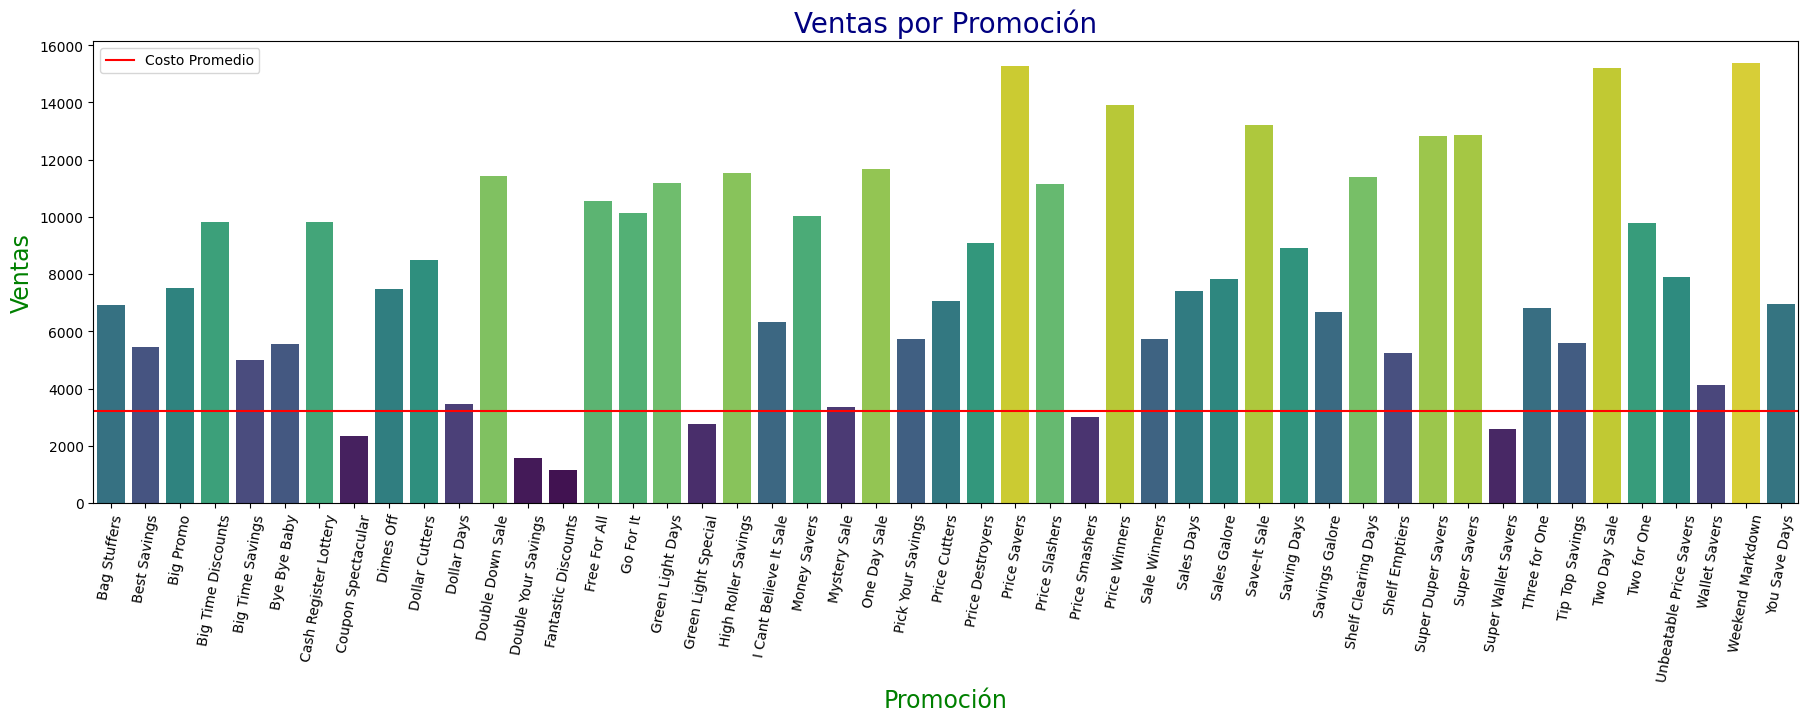

In [28]:
#Extraer los valores de ventas en una variable nueva para el eje y
sales_values = sales_by_promotion['store_sales(in millions)']
#definimos la paleta de colores en función de la nueva variable de eje y:
palette = sns.color_palette("viridis", len(sales_values))
#Ordenamos el tono de la paleta de menor a mayor:
rank = sales_values.argsort().argsort()
#Usamos rank para indexar la paleta invertida y asignar los colores a las barras en el orden correcto según las ventas:
palette = np.array(palette)[rank].tolist()

GF1 = plt.figure(figsize=(22, 6))
#Creamos un grafico de Barras con la ayuda de la lubreria Seaborn:
sns.barplot(x='promotion_name', y='store_sales(in millions)',
            hue='promotion_name', data=sales_by_promotion, palette=palette, legend=False)
#Seteamos los titulos y ejes del gráfico:
plt.title('Ventas por Promoción',color='navy', fontsize=20)
plt.xlabel('Promoción',color='green', fontsize=17)
plt.ylabel('Ventas',color='green', fontsize=17)
plt.axhline(y=sales_by_promotion['store_cost(in millions)'].mean(), color='red', linestyle='-', label='Costo Promedio')
plt.legend()
plt.xticks(rotation=80)
GF1=plt.show()

Con esta representación gráfica podemos observar las promociones más efectivas en términos de aumento de ventas y midiendo a simple vista con el trazo rojo que promociones están por encima o por debajo del costo promedio.

In [29]:
df.promotion_name.value_counts()

promotion_name
Weekend Markdown           2330
Two Day Sale               2321
Price Savers               2279
Price Winners              2108
Save-It Sale               2001
Super Duper Savers         1986
Super Savers               1930
One Day Sale               1843
Double Down Sale           1755
High Roller Savings        1741
Green Light Days           1702
Shelf Clearing Days        1690
Price Slashers             1647
Free For All               1621
Cash Register Lottery      1555
Go For It                  1521
Two for One                1493
Money Savers               1489
Big Time Discounts         1480
Price Destroyers           1374
Saving Days                1353
Dollar Cutters             1326
Unbeatable Price Savers    1217
Sales Galore               1212
Big Promo                  1172
Dimes Off                  1150
Sales Days                 1107
Price Cutters              1099
You Save Days              1075
Savings Galore             1067
Bag Stuffers               1066
Three for One              1042
I Cant Believe It Sale      972
Sale Winners                910
Pick Your Savings           876
Bye Bye Baby                874
Best Savings                868
Tip Top Savings             862
Shelf Emptiers              799
Big Time Savings            745
Wallet Savers               608
Dollar Days                 532
Mystery Sale                511
Price Smashers              449
Green Light Special         427
Coupon Spectacular          402
Super Wallet Savers         389
Double Your Savings         242
Fantastic Discounts         210
Name: count, dtype: int64

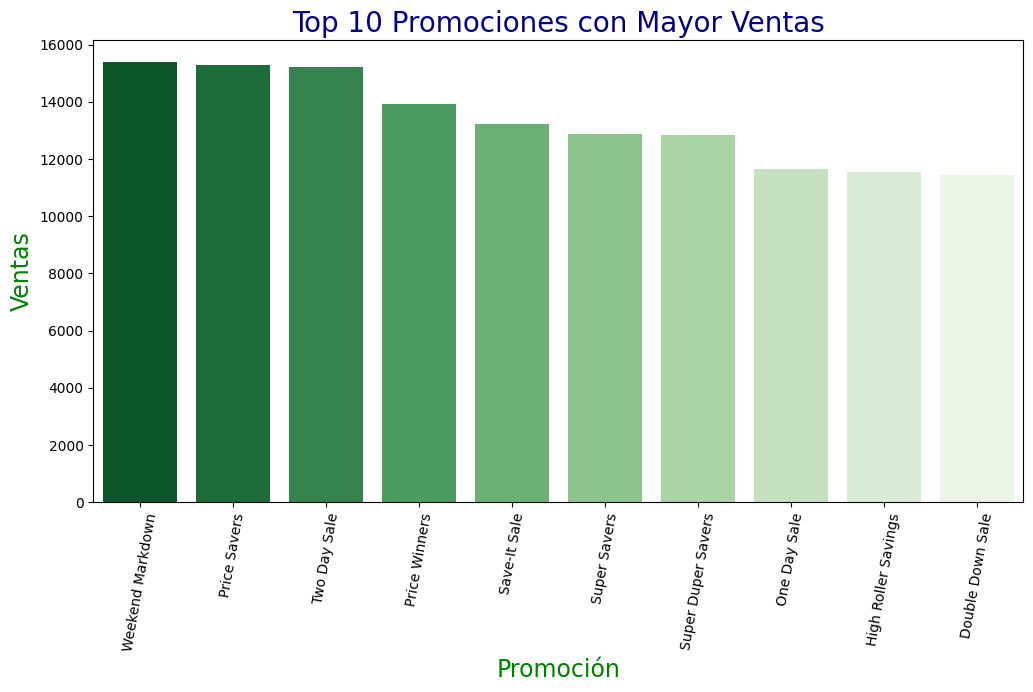

In [30]:
# Obtener el Top 10 de promociones con mayores ventas
top_promotions = sales_by_promotion.nlargest(10, 'store_sales(in millions)')

# Definimos la paleta de colores según la nueva variable del eje y para el Top 10
palette = sns.color_palette("Greens", len(top_promotions))

# Ordenamos el tono de la paleta de menor a mayor
rank = top_promotions['store_sales(in millions)'].argsort().argsort()

# Reasignamos la paleta con los colores ordenados
palette = np.array(palette)[rank]

# Creamos la figura para el gráfico
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras con el Top 10
sns.barplot(x='promotion_name', y='store_sales(in millions)',data=top_promotions, palette=palette.tolist(), hue='promotion_name', legend=False)

# Configuramos los títulos y etiquetas de los ejes
plt.title('Top 10 Promociones con Mayor Ventas',color='navy', fontsize=20)
plt.xlabel('Promoción',color='green', fontsize=17)
plt.ylabel('Ventas',color='green', fontsize=17)

# Rotamos las etiquetas del eje x para mejor visualización
plt.xticks(rotation=80)

# Mostramos el gráfico
plt.show()

En esta representacón gráfica se muestran las 10 promociones con mayores ventas

Con ambos gráficos verificar que "Weekend Markdown" tiene un impacto significativamente positivo en las ventas, mientras que otras promociones pueden tener un impacto menor. Las promociones como por ejemplo Weekend Markdown, Price Savers, Two Day Sale, Price Winners, entre otras cuyas barras están por encima del costo promedio son las más rentables. Las promociones que estan cerca de la barra promedio requieren mas ajustes para mejorar su rentabilidad.

Las promociones que aparecen en el segundo gráfico son las más exitosas generando mayor impacto lo cuál deberían ser priorizadas en futuras estrategias

### Ventas-costos de paises

In [31]:
#Agrupamos las ventas de las tiendas por Paises:
country_sales_cost = df.groupby('sales_country')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(country_sales_cost)

  sales_country  store_sales(in millions)  store_cost(in millions)
0        Canada                  26277.08               10523.4346
1        Mexico                 115565.10               46377.6993
2           USA                 253419.22              101387.5648


In [32]:
country_sales_cost.groupby('sales_country').describe()

store_sales(in millions)                                       \
                                 count       mean std        min        25%   
sales_country                                                                 
Canada                             1.0   26277.08 NaN   26277.08   26277.08   
Mexico                             1.0  115565.10 NaN  115565.10  115565.10   
USA                                1.0  253419.22 NaN  253419.22  253419.22   

                                               store_cost(in millions)  \
                     50%        75%        max                   count   
sales_country                                                            
Canada          26277.08   26277.08   26277.08                     1.0   
Mexico         115565.10  115565.10  115565.10                     1.0   
USA            253419.22  253419.22  253419.22                     1.0   

                                                                       \
                      mean std          min          25%          50%   
sales_country                                                           
Canada          10523.4346 NaN   10523.4346   10523.4346   10523.4346   
Mexico          46377.6993 NaN   46377.6993   46377.6993   46377.6993   
USA            101387.5648 NaN  101387.5648  101387.5648  101387.5648   

                                         
                       75%          max  
sales_country                            
Canada          10523.4346   10523.4346  
Mexico          46377.6993   46377.6993  
USA            101387.5648  101387.5648

Realizo código para representaciòn gráfica

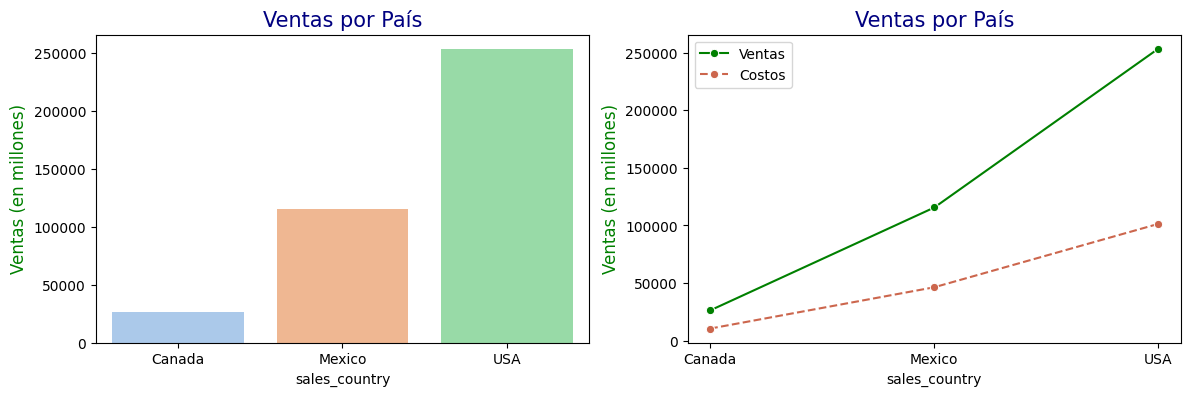

In [33]:
#Establecemos las dimensiones de los graficos y la posición de cada uno con la Herramienta Pyplot de Matplotlip
#Crearemos 3 gráicos diferentes
GF2= fig, axes = plt.subplots(1, 2, figsize=(14, 4))

#POSICIÓN 1
#grafico de barras ventas por pais con la lubrería Seaborn
axes1 = sns.barplot(x='sales_country', y='store_sales(in millions)', hue='sales_country', data=country_sales_cost, ax=axes[0], palette='pastel', legend=False)
#Edición de titulos y Texto
axes[0].set_title('Ventas por País',color='navy', fontsize=15)
axes[0].set_ylabel('Ventas (en millones)',color='green', fontsize=12)

#POSICIÓN 2
#Grafico de linease variacion de ventas y costos por pais
axes2=sns.lineplot(x='sales_country', y='store_sales(in millions)', data=country_sales_cost, label='Ventas', marker='o', color='green')
axes2_1=sns.lineplot(x='sales_country', y='store_cost(in millions)', data=country_sales_cost, label='Costos', marker='o', color=(0.8, 0.4, 0.3), linestyle='--')
axes[1].set_title('Ventas por País',color='navy', fontsize=15)
axes[1].set_ylabel('Ventas (en millones)',color='green', fontsize=12)


GF2=plt.show()

En Estados Unidos las ventas son significativamente más altas que México y Canadá, esto prodria indicar que EEUU tiene una mayor demanda de productos o que la promociones en este país son mas efectivas. Por otro lado se observa que en los tres paìses tienen rentabilidad, pero canadá tiene altos costos en comparación a las ventas generadas. EEUU tiene más ventas y por lo tanto mayor costo que los demas países.

### Influencia del nivel educativo en elecciones de supermercados

In [34]:
#Agrupamos las ventas de las tiendas por tipo de tienda:
type_sales_cost = df.groupby('store_type')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(type_sales_cost)

            store_type  store_sales(in millions)  store_cost(in millions)
0   Deluxe Supermarket                 152304.54               61074.9974
1  Gourmet Supermarket                  42974.80               17209.1167
2     Mid-Size Grocery                  18963.35                7602.0270
3        Small Grocery                   6493.96                2596.4851
4          Supermarket                 174524.75               69806.0725


In [35]:
type_sales_cost.groupby('store_type').describe()

store_sales(in millions)                            \
                                       count       mean std        min   
store_type                                                               
Deluxe Supermarket                       1.0  152304.54 NaN  152304.54   
Gourmet Supermarket                      1.0   42974.80 NaN   42974.80   
Mid-Size Grocery                         1.0   18963.35 NaN   18963.35   
Small Grocery                            1.0    6493.96 NaN    6493.96   
Supermarket                              1.0  174524.75 NaN  174524.75   

                                                                 \
                           25%        50%        75%        max   
store_type                                                        
Deluxe Supermarket   152304.54  152304.54  152304.54  152304.54   
Gourmet Supermarket   42974.80   42974.80   42974.80   42974.80   
Mid-Size Grocery      18963.35   18963.35   18963.35   18963.35   
Small Grocery          6493.96    6493.96    6493.96    6493.96   
Supermarket          174524.75  174524.75  174524.75  174524.75   

                    store_cost(in millions)                              \
                                      count        mean std         min   
store_type                                                                
Deluxe Supermarket                      1.0  61074.9974 NaN  61074.9974   
Gourmet Supermarket                     1.0  17209.1167 NaN  17209.1167   
Mid-Size Grocery                        1.0   7602.0270 NaN   7602.0270   
Small Grocery                           1.0   2596.4851 NaN   2596.4851   
Supermarket                             1.0  69806.0725 NaN  69806.0725   

                                                                     
                            25%         50%         75%         max  
store_type                                                           
Deluxe Supermarket   61074.9974  61074.9974  61074.9974  61074.9974  
Gourmet Supermarket  17209.1167  17209.1167  17209.1167  17209.1167  
Mid-Size Grocery      7602.0270   7602.0270   7602.0270   7602.0270  
Small Grocery         2596.4851   2596.4851   2596.4851   2596.4851  
Supermarket          69806.0725  69806.0725  69806.0725  69806.0725

<ipython-input-75-d9a737b5a533>:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



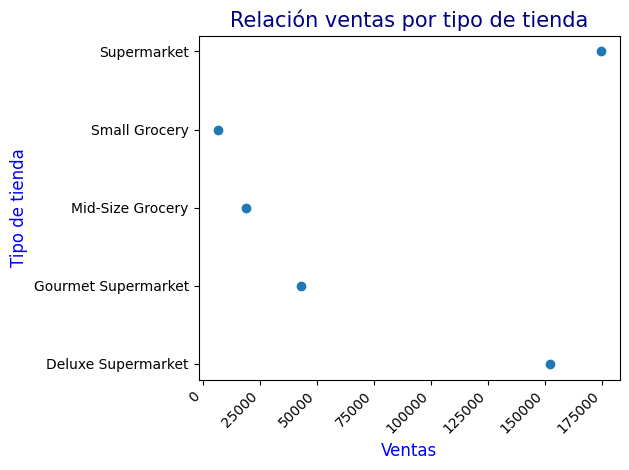

In [75]:
fig, ax = plt.subplots()
#Usamos un gráfico de dispersión con Matplotlip
#Designamos una paleta de colores en función de los costos por tienda:
paleta_colores = ax.scatter(type_sales_cost['store_sales(in millions)'], type_sales_cost['store_type'], cmap='plasma')


#Modificamos parametros de este grafico
ax.set_title('Relación ventas por tipo de tienda',color='navy', fontsize=15)
ax.set_xlabel('Ventas',color='blue', fontsize=12)
ax.set_ylabel('Tipo de tienda', color='blue', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Esta representación gráfica permite observar como las ventas varian según el tipo de tienda, y además permite a simple vista cuáles tiendas tienen mayor costos. Hay dos tipos de tienda como Supermarket y Deluxe Supermarket que a pesar de tener altas ventas, también tienen altos costos.

In [37]:
#Agrupamos las ventas de las tiendas por tipo de educación de los usuarios:
education_sales_cost = df.groupby('education')[['store_sales(in millions)', 'store_cost(in millions)']].sum().reset_index()
print(education_sales_cost)

             education  store_sales(in millions)  store_cost(in millions)
0     Bachelors Degree                 104179.09               41740.1449
1      Graduate Degree                  19880.73                7957.8046
2   High School Degree                 117959.79               47185.3046
3      Partial College                  34235.70               13707.0960
4  Partial High School                 119006.09               47698.3486


In [38]:
education_sales_cost.groupby('education').describe()

store_sales(in millions)                            \
                                       count       mean std        min   
education                                                                
Bachelors Degree                         1.0  104179.09 NaN  104179.09   
Graduate Degree                          1.0   19880.73 NaN   19880.73   
High School Degree                       1.0  117959.79 NaN  117959.79   
Partial College                          1.0   34235.70 NaN   34235.70   
Partial High School                      1.0  119006.09 NaN  119006.09   

                                                                 \
                           25%        50%        75%        max   
education                                                         
Bachelors Degree     104179.09  104179.09  104179.09  104179.09   
Graduate Degree       19880.73   19880.73   19880.73   19880.73   
High School Degree   117959.79  117959.79  117959.79  117959.79   
Partial College       34235.70   34235.70   34235.70   34235.70   
Partial High School  119006.09  119006.09  119006.09  119006.09   

                    store_cost(in millions)                              \
                                      count        mean std         min   
education                                                                 
Bachelors Degree                        1.0  41740.1449 NaN  41740.1449   
Graduate Degree                         1.0   7957.8046 NaN   7957.8046   
High School Degree                      1.0  47185.3046 NaN  47185.3046   
Partial College                         1.0  13707.0960 NaN  13707.0960   
Partial High School                     1.0  47698.3486 NaN  47698.3486   

                                                                     
                            25%         50%         75%         max  
education                                                            
Bachelors Degree     41740.1449  41740.1449  41740.1449  41740.1449  
Graduate Degree       7957.8046   7957.8046   7957.8046   7957.8046  
High School Degree   47185.3046  47185.3046  47185.3046  47185.3046  
Partial College      13707.0960  13707.0960  13707.0960  13707.0960  
Partial High School  47698.3486  47698.3486  47698.3486  47698.3486

<ipython-input-70-351ebe58189c>:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



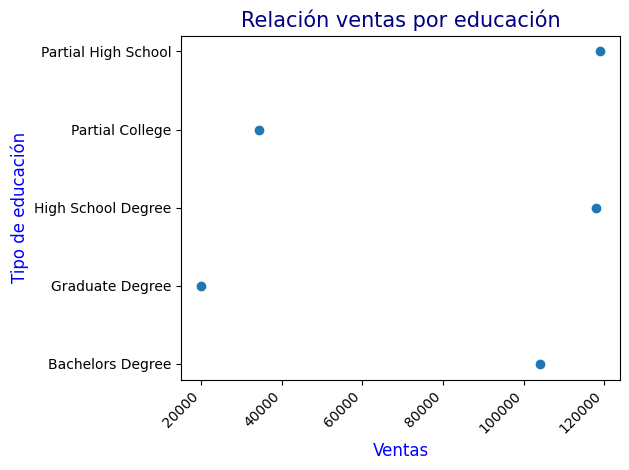

In [70]:
#Repetimos los mismos pasos del grafico anterior pero con el nuevo grupo por educación:
fig, ax = plt.subplots()

paleta_colores2 = ax.scatter(education_sales_cost['store_sales(in millions)'], education_sales_cost['education'], cmap='viridis')

cbar_costo2.ax.set_ylabel('ventas', rotation=90, labelpad=15,color='darkred', fontsize=15)
ax.set_title('Relación ventas por educación',color='navy', fontsize=15)
ax.set_xlabel('Ventas', color='blue', fontsize=12)
ax.set_ylabel('Tipo de educación', color='blue', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

El gráfico permite observar cómo varían las ventas en función del nivel educativo de los clientes. Se identifica que los clientes con una licenciatura o carrera de grado generan más ventas pero a su vez los clientes que no terminaron la escuela secundaria tambien tiene una tendencia alta en ventas.

In [61]:
fig = px.scatter(df,x='store_type', y='education', size='store_sales(in millions)', color='store_sales(in millions)', title='Relación entre ventas, tipo de tienda y educación')
fig.show()

La gráfica nos permite ver como varían las ventas según el tipo de tienda y el nivel educativo. Por lo que podemos identificar que los clientes que tienen titulo secundario o cursan la universidad prefieren las tiendas de tipo Deluxe Supermarket.

### Tendencias en clientes solteros en comidas congeladas.

In [42]:
# Filtramos DF por comidas congeladas "Frozen Foods"
df_frozen_food = df[df['food_department'] == 'Frozen Foods']
print(df_frozen_food)

         food_category food_department food_family  store_sales(in millions)  \
0      Breakfast Foods    Frozen Foods        Food                      7.36   
1      Breakfast Foods    Frozen Foods        Food                      5.52   
2      Breakfast Foods    Frozen Foods        Food                      3.68   
3      Breakfast Foods    Frozen Foods        Food                      3.68   
4      Breakfast Foods    Frozen Foods        Food                      4.08   
...                ...             ...         ...                       ...   
60198  Breakfast Foods    Frozen Foods        Food                      2.26   
60199  Breakfast Foods    Frozen Foods        Food                      1.16   
60200  Breakfast Foods    Frozen Foods        Food                      3.78   
60201  Breakfast Foods    Frozen Foods        Food                      2.52   
60202  Breakfast Foods    Frozen Foods        Food                      9.44   

       store_cost(in millions) unit_sal

In [43]:
# Agrupamos los datos por estado civil y sumamos las ventas de comida congelada
venta_estado_civil = df_frozen_food.groupby('marital_status')['store_sales(in millions)'].sum().reset_index()
print(venta_estado_civil)

  marital_status  store_sales(in millions)
0              M                  19549.80
1              S                  19505.31


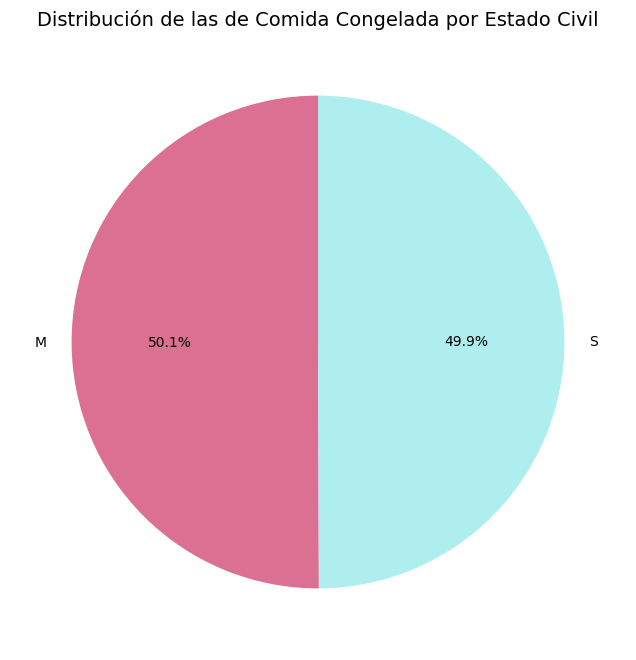

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(venta_estado_civil['store_sales(in millions)'],
        labels=venta_estado_civil['marital_status'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#DB7093', '#AFEEEE', '#AFEEEE', '#AFEEEE'])

# Añadir título
plt.title('Distribución de las de Comida Congelada por Estado Civil', fontsize=14)

# Mostrar el gráfico
plt.show()

In [45]:
# Verificamos que los valores en el grafico sean correctos, calculamos ventas de alimentos congelados segun estado civil.
print(venta_estado_civil)

  marital_status  store_sales(in millions)
0              M                  19549.80
1              S                  19505.31


En esta representación gràfica podemos observar que no hay relación alguna entre el estado civil de los clientes con el tipo de producto. Ya que la tendencia es mínima e incluso se verifica que los clientes solteros consumen menos que los casados productos congelados.

### Mediana costo-ventas por género

In [46]:
df[['gender', 'cost']]

gender    cost
0          F  126.62
1          M   59.86
2          F   84.16
3          F   95.78
4          M   50.79
...      ...     ...
60423      F   95.25
60424      F   69.42
60425      M   67.51
60426      M  132.88
60427      F   87.76

[60428 rows x 2 columns]

In [47]:
# Agrupamos costo total y genero para luego poder obtener la suma y la mediana
Mediana_Costo = df.groupby('gender')['cost'].sum().reset_index()
print(Mediana_Costo)

  gender        cost
0      F  3079175.00
1      M  2919051.26


In [48]:
# Definimos cuartiles para poder graficarlos.
cuartiles = df.groupby('gender')['cost'].describe()

# Cuartiles
print(cuartiles[['25%', '50%', '75%']])

          25%    50%     75%
gender                      
F       70.32  97.34  126.62
M       69.63  98.81  126.24


In [49]:
# Creamos grafico de costo total por genero.
fig = px.box(df,
             x='gender',
             y='cost',
             color='gender',
             color_discrete_map={'M': 'skyblue', 'F': 'violet'},# Color asignado segun genero
             category_orders={'gender': ['F', 'M']},  # Orden de las categorías
             title='Costo Total por Género')


fig.show()

In [50]:
# Verificacion de los datos mostrados en grafico, calculamos la suma y le

print(df.groupby('gender')['cost'].sum()) #Suma de costos
print(df.groupby('gender')['cost'].median()) # Mediana de costos

gender
F    3079175.00
M    2919051.26
Name: cost, dtype: float64
gender
F    97.34
M    98.81
Name: cost, dtype: float64


Esta representación gráfica de tipo boxplot visualiza el costo total por género, y podemos observar en ella como la mediana, así como los valores máximos y minimos no presentan más que una difencia muy mínima y nada significante.

### Tendencias de ventas por marcas

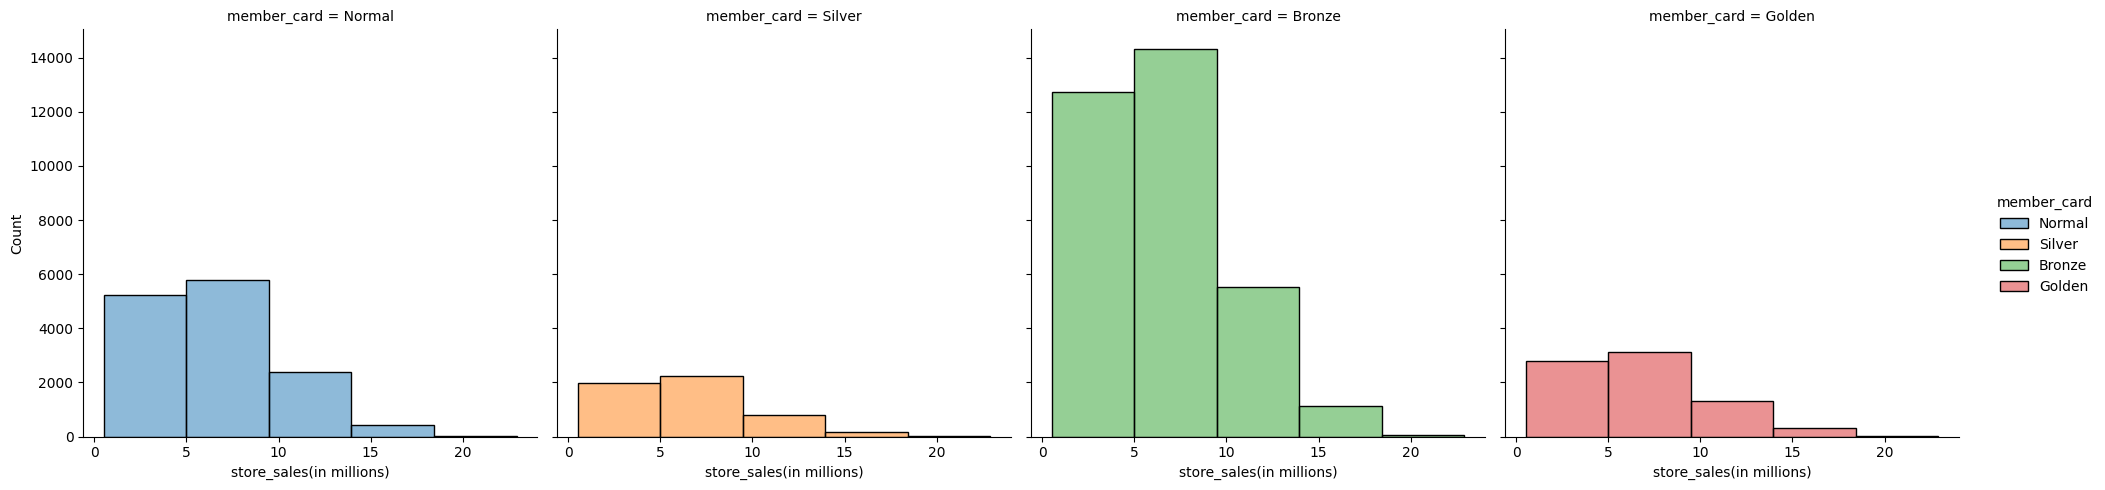

In [51]:

#Crear el histograma con colores personalizados
sns.displot(data=df, x="store_sales(in millions)", hue="member_card",col="member_card",bins=5, kde=False)


Con estás gráficas podemos visualizar como las ventas se distribuyen para cada tipo de tarjeta. Observamos que los clientes con tarjetas bronze tienden a gastar más.